![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Separen el dataset en X, y (variable objetivo)

In [191]:
hosp=pd.read_csv("PacientesHosp.csv")
hosp.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS POST BIOP c/ COMPLICACION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,12,0,0,10,0,1,0,9,1,1,0,2,1,2,1,1,0
1,15,0,0,52,0,1,0,9,1,1,0,2,1,2,1,4,0
2,16,0,0,123,1,1,0,9,1,1,0,0,0,0,1,3,2
3,15,0,0,46,0,1,0,9,1,1,0,2,1,2,1,4,0
4,14,0,0,123,1,1,0,9,1,1,0,0,0,2,1,3,2


Separen el dataset en X_train, X_test, y_train y y_test

In [192]:
hosp.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'DIAS POST BIOP c/ COMPLICACION', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO',
       'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [193]:
from sklearn.model_selection import train_test_split
X = hosp[['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
        'FIEBRE', 'ITU', 'TIPO DE CULTIVO',
       'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 
        'DIAS HOSPITALIZACIÓN UPC']]  # Denotamos X con mayúscula ya que
                                                     # incluye más de un atributo

y = hosp.HOSPITALIZACION # Etiqueta a predecir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # Separamos nuestros
                                                                                           #datos, dejando un 30%
                                                                                           #para testear

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(452, 14) (452,) (113, 14) (113,)


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [194]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 15, random_state = 42)

In [195]:
# Entrenamos el modelo

clf.fit(X_train.values,y_train.values)
clf.fit(X_test.values,y_test.values)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [196]:
# Predecimos

y_train_pred = clf.predict(X_train.values)
y_test_pred = clf.predict(X_test.values)

In [197]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.9579646017699115
1.0


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [198]:
# Exploramos algunas de las características del modelo entrenado. Para pensar,
# ¿qúe representa cada uno de estos valores?

print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0 1]
2
14
[0.2989418 0.        0.        0.        0.        0.        0.
 0.        0.7010582 0.        0.        0.        0.        0.       ]


Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [199]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

In [200]:
# graficamos la matriz
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)


In [201]:
matrix

array([[428,   5],
       [ 14,   5]], dtype=int64)

In [202]:
matrix_2

array([[108,   0],
       [  0,   5]], dtype=int64)

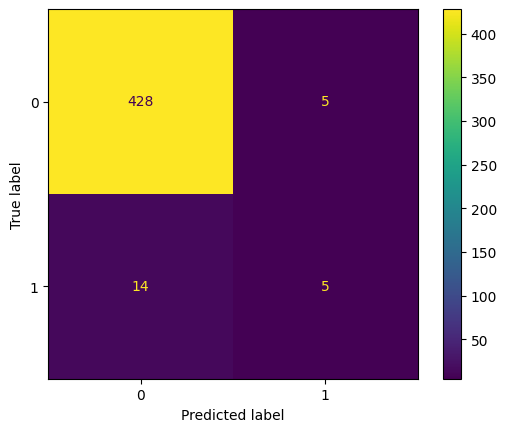

In [203]:
# en el modelo de entrenamiento tengo sobre 377 2 hospitalizados
# en mi modelo de test sobre 15 tengo cero
cm_display.plot()
plt.show()

In [204]:
# exactitud 
# es una métrica que te ayuda a evaluar cuán preciso es un modelo de clasificación
# en sus predicciones al medir la proporción de predicciones correctas.
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_train, y_train_pred)
print(exactitud)

0.9579646017699115


In [205]:
#presicion resultados corrector sobre el total de muestras seleccionadas
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred, average= None)
print(precision)


[1. 1.]


In [206]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_test_pred, average= None)
print(recall)

[1. 1.]


In [207]:
from sklearn.metrics import f1_score

f1_sc = f1_score(y_test, y_test_pred, average= None)
print(f1_sc, type(precision))

[1. 1.] <class 'numpy.ndarray'>


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

C:\Users\Musi\AppData\Local\Temp\ipykernel_13192\3942820271.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


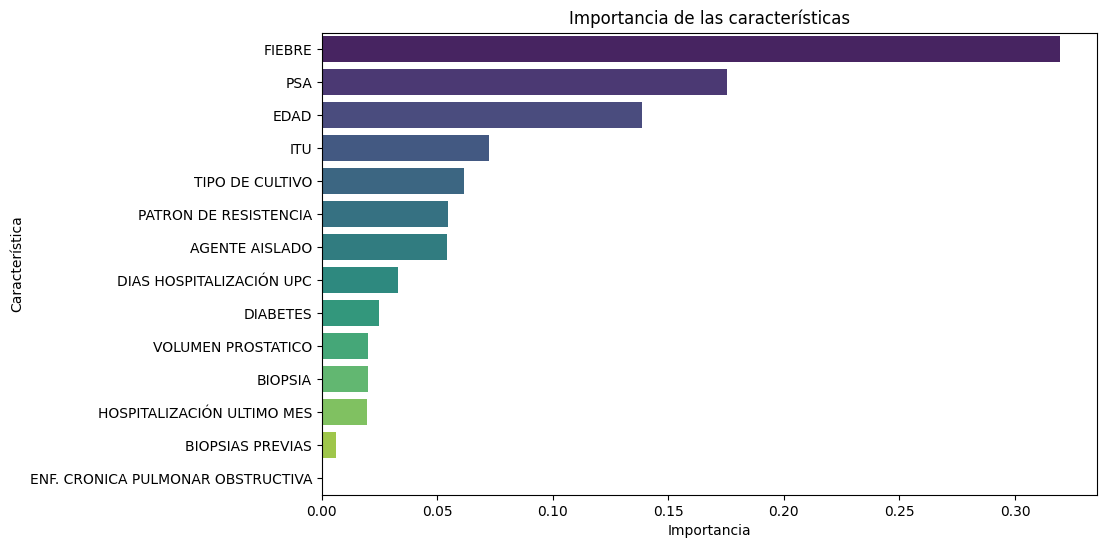

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Supongamos que tienes un DataFrame llamado "df" con tus datos, y la columna objetivo
# se llama "target".
# Ajusta un modelo de Random Forest

model = RandomForestClassifier()
model.fit(X, y)

# Extrae la importancia de las características del modelo
feature_importance = model.feature_importances_

# Crea un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})

# Ordena las características por importancia
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Crea el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Importancia de las características")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()


Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [249]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Supongamos que tienes tus datos en X (variables predictoras) e y (variable objetivo)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir una lista de valores de max_depth a probar
param_grid = {'max_depth': [None, 3, 4, 6, 10, 15]}

# Inicializar el modelo de árbol de decisión
tree = DecisionTreeClassifier()

# Realizar una búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de max_depth
best_max_depth = grid_search.best_params_['max_depth']

# Crear el modelo con el mejor max_depth
best_tree = DecisionTreeClassifier(max_depth=best_max_depth)
best_tree.fit(X_train, y_train)

# Evaluar el modelo con max_depth óptimo
y_pred_best = best_tree.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_score_best = f1_score(y_test, y_pred_best)

# Crear el modelo con una profundidad arbitraria (por ejemplo, max_depth=5)
arbitrary_tree = DecisionTreeClassifier(max_depth=5)
arbitrary_tree.fit(X_train, y_train)

# Evaluar el modelo con profundidad arbitraria
y_pred_arbitrary = arbitrary_tree.predict(X_test)
accuracy_arbitrary = accuracy_score(y_test, y_pred_arbitrary)
precision_arbitrary = precision_score(y_test, y_pred_arbitrary)
recall_arbitrary = recall_score(y_test, y_pred_arbitrary)
f1_score_arbitrary = f1_score(y_test, y_pred_arbitrary)

# Imprimir las métricas de evaluación
print("Modelo con max_depth óptimo ({}):".format(best_max_depth))
print("Accuracy: {:.2f}".format(accuracy_best))
print("Precision: {:.2f}".format(precision_best))
print("Recall: {:.2f}".format(recall_best))
print("F1 Score: {:.2f}".format(f1_score_best))
print("\nModelo con profundidad arbitraria (max_depth=5):")
print("Accuracy: {:.2f}".format(accuracy_arbitrary))
print("Precision: {:.2f}".format(precision_arbitrary))
print("Recall: {:.2f}".format(recall_arbitrary))
print("F1 Score: {:.2f}".format(f1_score_arbitrary))


Modelo con max_depth óptimo (15):
Accuracy: 0.98
Precision: 0.80
Recall: 0.80
F1 Score: 0.80

Modelo con profundidad arbitraria (max_depth=5):
Accuracy: 0.99
Precision: 1.00
Recall: 0.80
F1 Score: 0.89


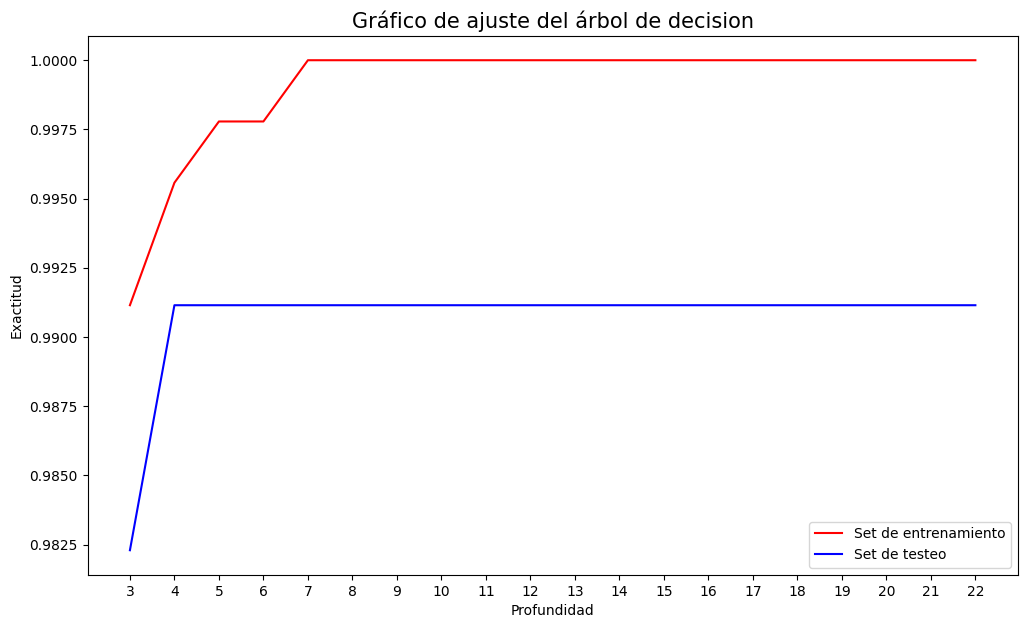

In [247]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 23))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.xticks(max_deep_list)
plt.show()

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [240]:
# probamos con el hiperparametro 6 de vecinos
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=6)

In [241]:
# Entrenamos

clf.fit(X.values,y.values)

KNeighborsClassifier(n_neighbors=9)

In [242]:
# Predecimos

y_pred = clf.predict(X.values)

In [243]:

# Evaluamos

print(accuracy_score(y,y_pred))
print(precision_score(y, y_pred))
print(recall_score(y, y_pred))
print(f1_score(y, y_pred))

0.9575221238938053
0.0
0.0
0.0


c:\Users\Musi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Encuentre el valor óptimo para k

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [ ]:
from IPython.display import clear_output

knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

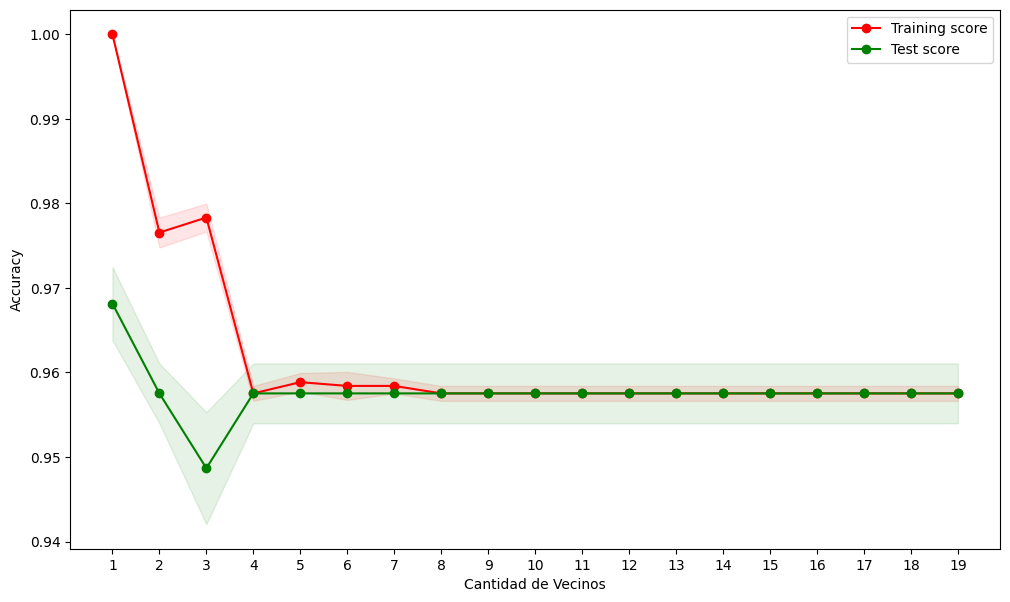

In [227]:

# Asegúrate de que tus datos de entrenamiento y prueba estén ordenados de acuerdo a estos valores.

plt.figure(figsize=(12, 7))
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.xticks(n_vecinos)  # Establecer los valores del eje x
plt.show()


In [ ]:
# El valor optimo para K es 4

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [244]:
print(accuracy_score(y,y_pred))
print(precision_score(y, y_pred))
print(recall_score(y, y_pred))
print(f1_score(y, y_pred))

0.9575221238938053
0.0
0.0
0.0


c:\Users\Musi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X.values,y.values)
y_pred = clf.predict(X.values)
# Evaluamos con k=4

print(accuracy_score(y,y_pred))
print(precision_score(y, y_pred))
print(recall_score(y, y_pred))
print(f1_score(y, y_pred))

0.9575221238938053
0.0
0.0
0.0


c:\Users\Musi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Un alto valor de precisión indica que la mayoría de las predicciones del modelo son correctas en general, lo que es contradictorio con un valor de cero en precisión, recall y F1-score.

Una posible explicación para este comportamiento es que hay una gran cantidad de datos de una clase (posiblemente la clase mayoritaria) y muy pocos datos de la otra clase (posiblemente la clase minoritaria) en tu conjunto de datos, y el modelo ha predecido la clase mayoritaria en la mayoría de los casos. Como resultado, la precisión general es alta debido a que la mayoría de las predicciones son correctas en la clase mayoritaria, pero el modelo no ha hecho ninguna predicción en la clase minoritaria, lo que da como resultado valores de cero en precision, recall y F1-score para esa clase.

Para abordar este problema, puedes considerar las siguientes acciones:

Revisar el balance de clases: Asegúrate de que tu conjunto de datos no esté altamente desbalanceado, es decir, que no haya una gran diferencia en la cantidad de ejemplos entre las clases. Si tienes un desbalance significativo, podrías aplicar técnicas de remuestreo, como el sobremuestreo de la clase minoritaria o el submuestreo de la clase mayoritaria.

Ajustar las métricas de evaluación: Considera utilizar métricas de evaluación alternativas, como la precisión balanceada (balanced accuracy) o el área bajo la curva ROC (AUC-ROC), que pueden proporcionar una visión más precisa del rendimiento del modelo en conjuntos de datos desbalanceados.

Revisar el modelo y la estrategia de entrenamiento: Asegúrate de que estás utilizando el modelo apropiado y que has ajustado los hiperparámetros de manera adecuada. También verifica que estás utilizando la estrategia de entrenamiento correcta para el problema de clasificación.

Considere técnicas de clasificación desbalanceada: Algunos algoritmos y técnicas están diseñados específicamente para manejar conjuntos de datos desbalanceados. Puedes investigar técnicas como el aumento de datos sintéticos (SMOTE), la ponderación de clases o el uso de algoritmos de aprendizaje profundo con atención a la clase minoritaria.

En resumen, aunque la precisión general sea alta, es importante prestar atención a cómo se están comportando las métricas específicas de clasificación en las diferentes clases, especialmente si el conjunto de datos está desbalanceado. Esto te ayudará a evaluar con mayor precisión el rendimiento del modelo.






R


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

El arbol de descicion tuvo mejor performance para este set de datos.
Se podria mejorar la performance del modelo Aumentar el tamaño del conjunto de datos. 
Teniendo mas información acerca de las condicones para la hospitalizacion de un paciente.

R/